In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['BTC', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

In [3]:
rn = 'BBT_future_Tiingo_ada'
# rn = 'BBT_future_Tiingo_eth'

rm = 'Variance'

path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)

df = pd.read_csv(path)
df.Date = pd.to_datetime(df.Date)

2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00
2021-05-27 20:00:00


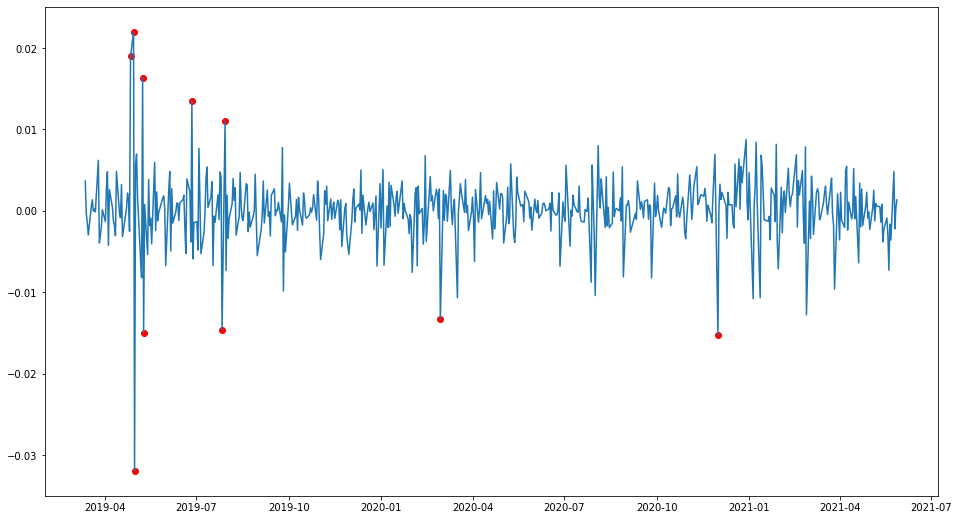

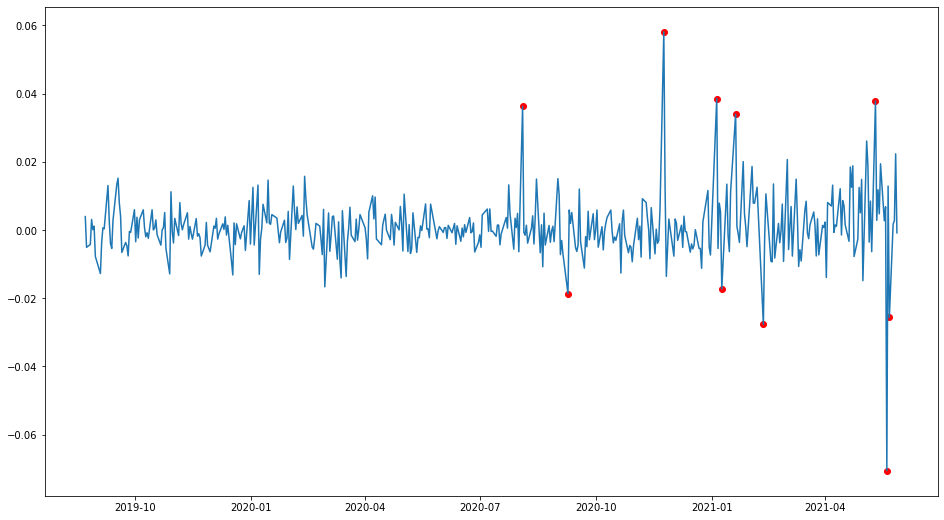

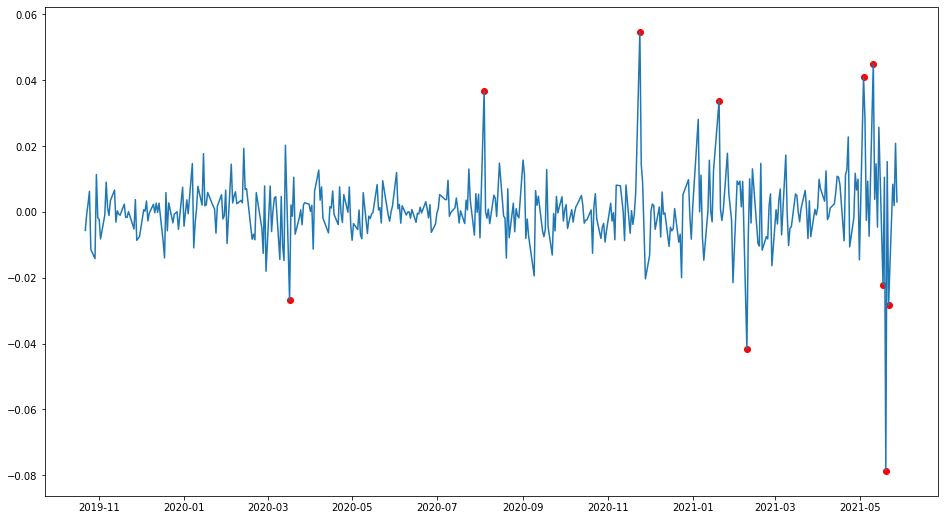

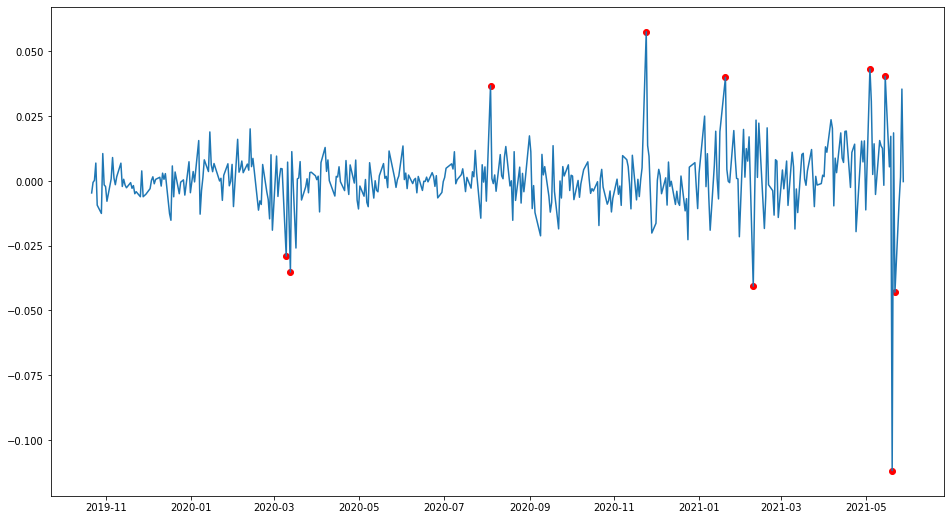

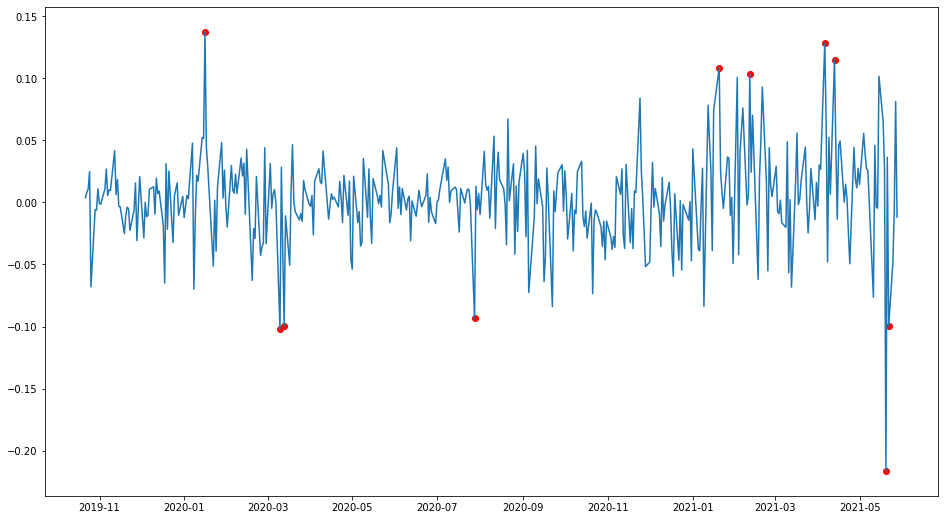

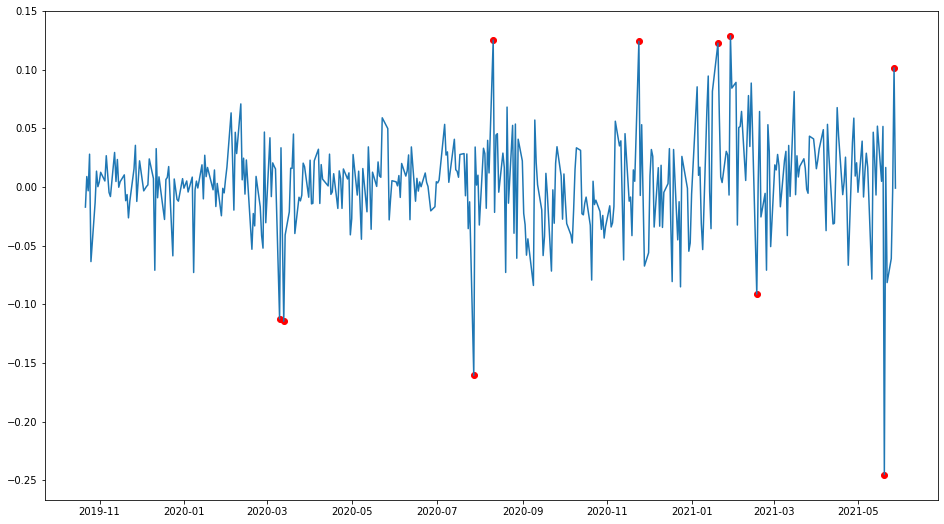

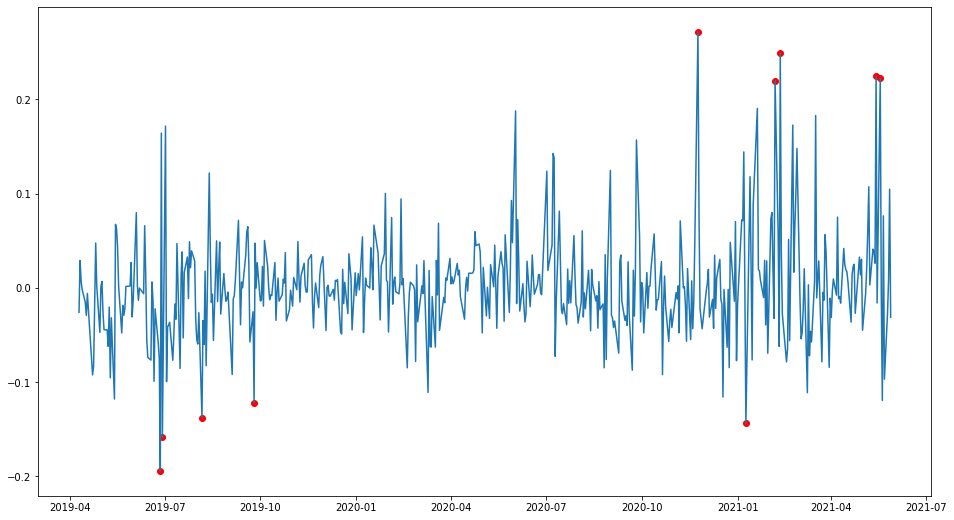

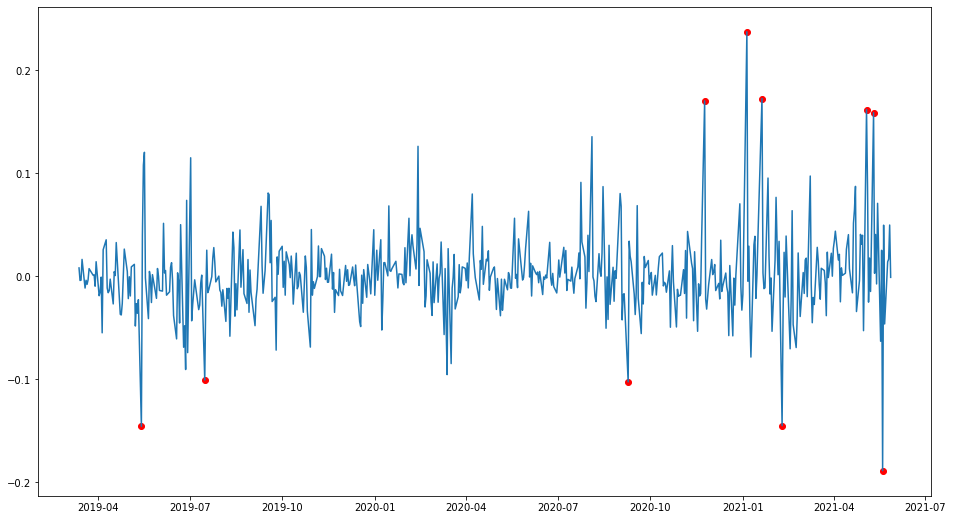

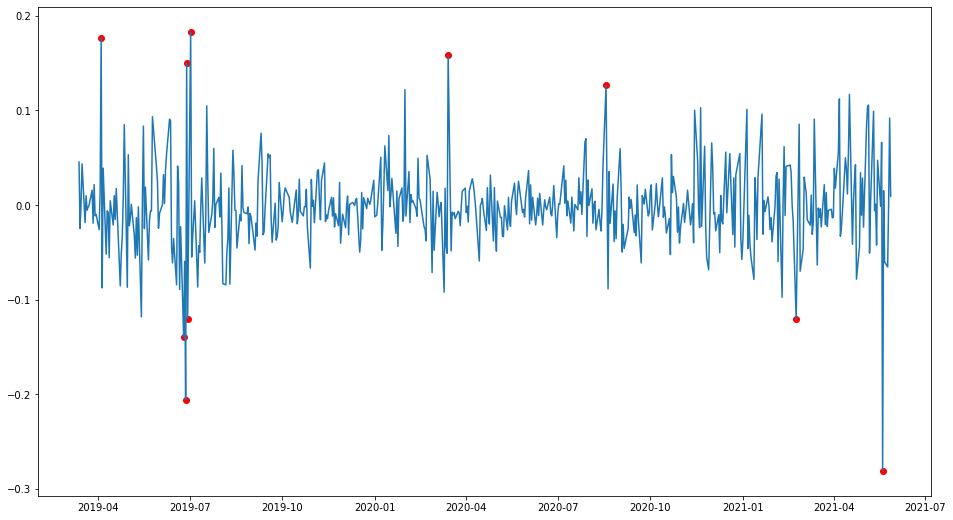

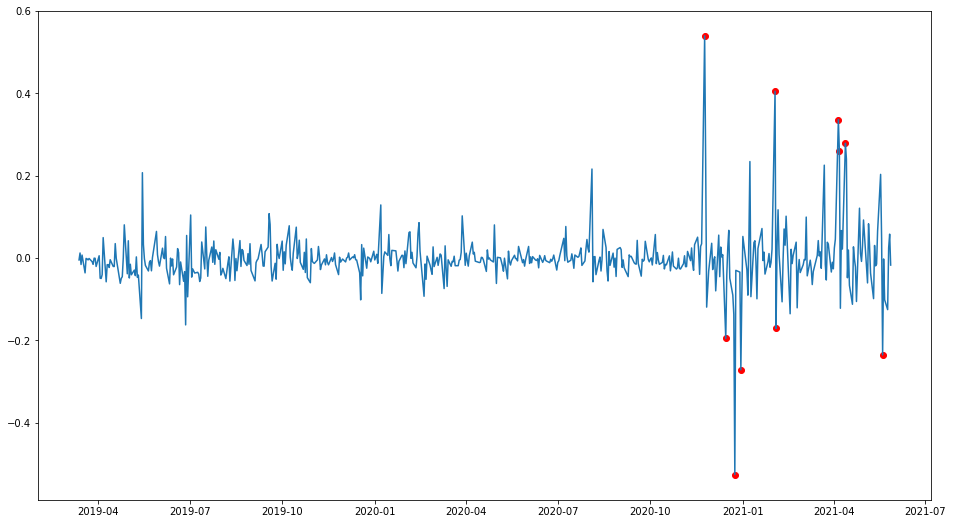

In [4]:
# Top 10 worst days
M_outer = []
m_outer = []

num = 5

rm = 'ERM k=10'

for rn in order:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    print(df.Date[0])
    rs = df.rs
    rh = df.rh

    df.loc[:,'diff'] = np.abs(df.rh/df.rs)

    plt.figure(figsize=(16,9))
    plt.plot(df.Date, df.loc[:,'rh'])
    
#     df = df.sort_values('diff')
#     pos_rs_id = df.rs>0
#     neg_rs_id = df.rs<0
#     m = df.loc[neg_rs_id, ['Date', 'rs', 'rf', 'rh']].iloc[:num, :]
#     M = df.loc[pos_rs_id, ['Date', 'rs', 'rf', 'rh']].iloc[-num:,:]

    df = df.sort_values('rh')
    m = df.loc[:, ['Date', 'rs', 'rf', 'rh']].iloc[:num, :]
    M = df.loc[:, ['Date', 'rs', 'rf', 'rh']].iloc[-num:,:]



#     for i in mi:
    plt.scatter(list(m.Date), m.rh, color='r')
#     for i in Mi:
    plt.scatter(list(M.Date), M.rh, color='r')

    M_outer.append(M)
    m_outer.append(m)

In [5]:
c = []
for i in range(len(m_outer)):
    dates = list(m_outer[i].Date.dt.strftime("%Y-%m-%d"))
    dates = np.sort(dates)[::-1]
    c.append(pd.DataFrame(dates, index=dates))
    
d = []
for i in range(len(M_outer)):
    dates = list(M_outer[i].Date.dt.strftime("%Y-%m-%d"))
    dates = np.sort(dates)
    d.append(pd.DataFrame(dates, index=dates))

In [6]:
result = pd.concat(c, axis=1)
result.columns = coin_names
result
# result.reset_index(drop=True)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,btc,CRIX,BITX,BITW100,BITW20,BITW70,ada,eth,ltc,xrp
2019-04-30,2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-09,2019-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-13,NaN,NaN
2019-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-24,NaN
2019-06-26,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,NaN,2019-06-26,NaN
2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-28,NaN,2019-06-28,NaN
2019-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-15,NaN,NaN
2019-07-26,2019-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-05,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-05,NaN,NaN,NaN
2019-09-24,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-24,NaN,NaN,NaN


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return bound(*args, **kwds)


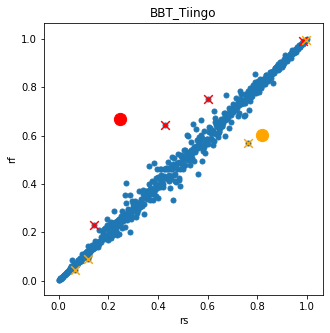

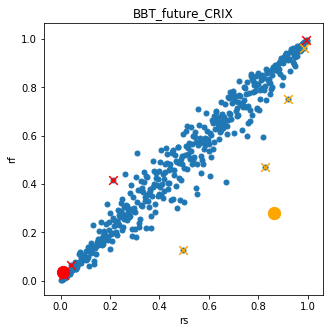

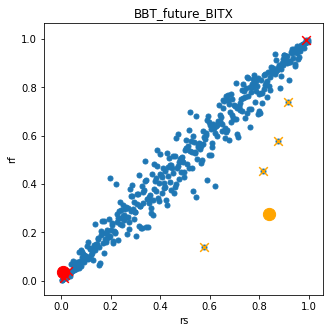

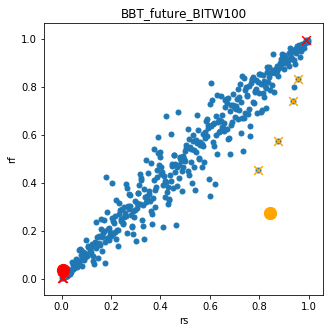

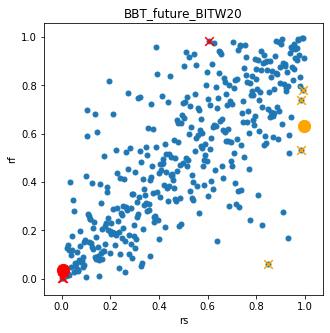

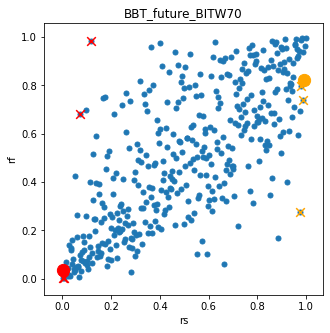

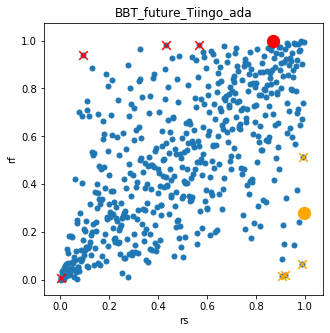

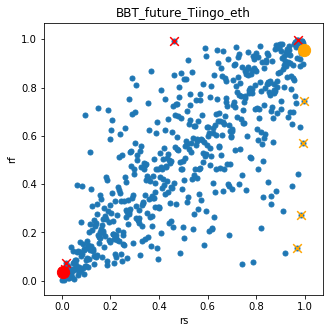

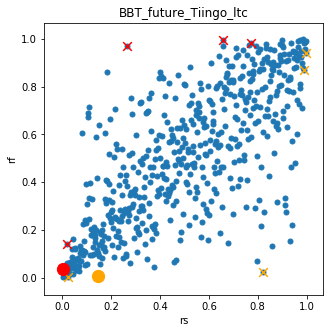

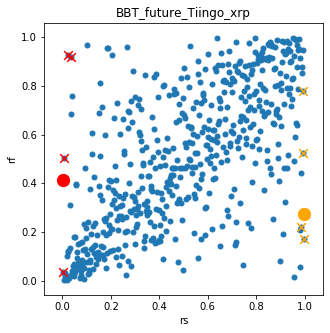

In [7]:
for i in range(len(order)):
    rn = order[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    ecdf_rs = ECDF(df.rs)
    ecdf_rf = ECDF(df.rf)

    u = ecdf_rs(df.rs)
    v = ecdf_rf(df.rf)
        
    plt.figure(figsize=(5,5))
    plt.scatter(u,v, s=25)
    plt.scatter(ecdf_rs(list(m_outer[i].rs)),ecdf_rf(list(m_outer[i].rf)),
                marker='x', color='r', s=75)
    
    plt.scatter(ecdf_rs(list(M_outer[i].rs)),ecdf_rf(list(M_outer[i].rf)),
                marker='x', color='orange', s=75)
    
    min_id = np.argmin(m_outer[i].rh)
    max_id = np.argmax(M_outer[i].rh)
    min_rs = m_outer[i].loc[min_id, 'rs']
    min_rf = m_outer[i].loc[min_id, 'rf']
    max_rs = M_outer[i].loc[max_id, 'rs']
    max_rf = M_outer[i].loc[max_id, 'rf']
    plt.scatter(ecdf_rs([min_rs]), ecdf_rf([min_rf]), color='r', marker='o', s=150)
    plt.scatter(ecdf_rs([max_rs]), ecdf_rf([max_rf]), color='orange', marker='o', s=150)

#     plt.xlim((0, 1))
#     plt.ylim((0, 1))
    plt.xlabel('rs')
    plt.ylabel('rf')

    plt.title(rn)

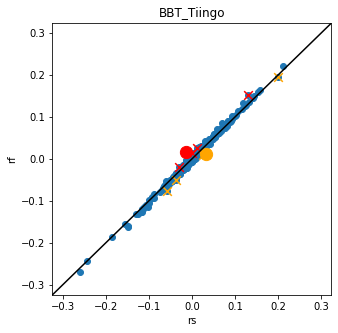

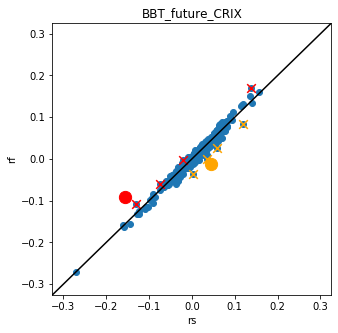

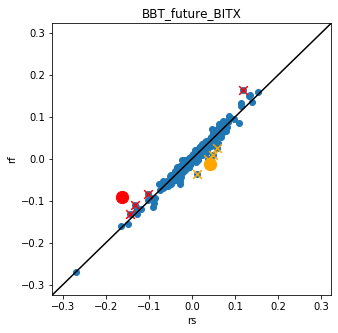

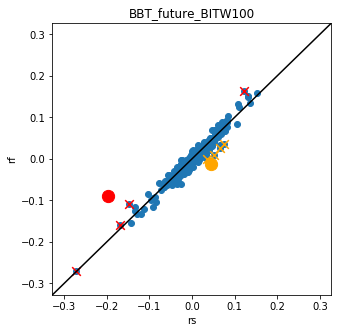

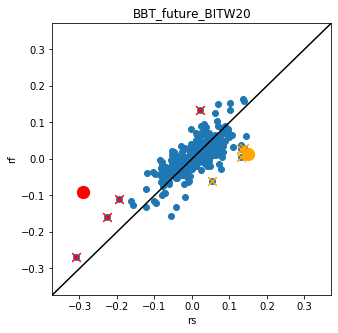

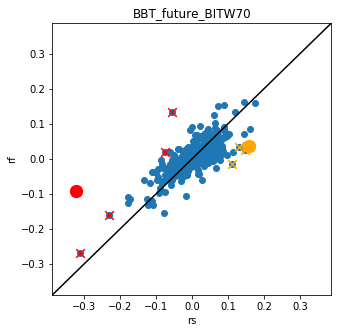

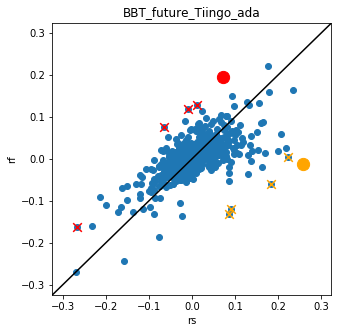

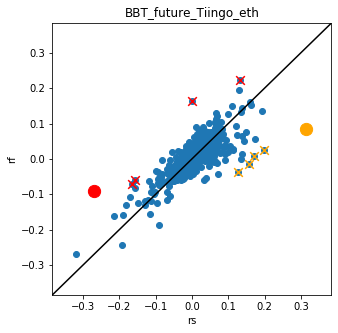

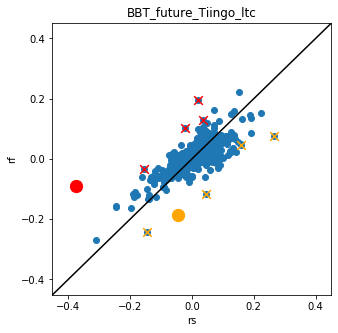

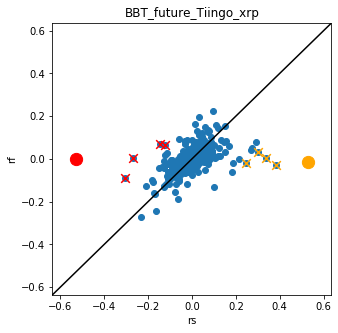

In [8]:
for i in range(len(order)):
    rn = order[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)

    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    ecdf_rs = ECDF(df.rs)
    ecdf_rf = ECDF(df.rf)

    u = df.rs
    v = df.rf
    
    _max = np.max([np.abs(u),np.abs(v)])*1.2
    
    plt.figure(figsize=(5,5))
    plt.scatter(u,v)
    plt.scatter((list(m_outer[i].rs)),(list(m_outer[i].rf)),
                marker='x', color='r', s=75)
    
    plt.scatter((list(M_outer[i].rs)),(list(M_outer[i].rf)),
                marker='x', color='orange', s=75)

    plt.xlim((-_max, _max))
    plt.ylim((-_max, _max))
    
    min_id = np.argmin(m_outer[i].rh)
    max_id = np.argmax(M_outer[i].rh)
    min_rs = m_outer[i].loc[min_id, 'rs']
    min_rf = m_outer[i].loc[min_id, 'rf']
    max_rs = M_outer[i].loc[max_id, 'rs']
    max_rf = M_outer[i].loc[max_id, 'rf']
    plt.scatter(([min_rs]), ([min_rf]), color='r', marker='o', s=150)
    plt.scatter(([max_rs]), ([max_rf]), color='orange', marker='o', s=150)
    
    diagonal = np.linspace(-_max, _max, 100)
    plt.plot(diagonal, diagonal, c='black')
    
    plt.xlabel('rs')
    plt.ylabel('rf')

    plt.title(rn)

In [9]:
coin_names

['btc',
 'CRIX',
 'BITX',
 'BITW100',
 'BITW20',
 'BITW70',
 'ada',
 'eth',
 'ltc',
 'xrp']

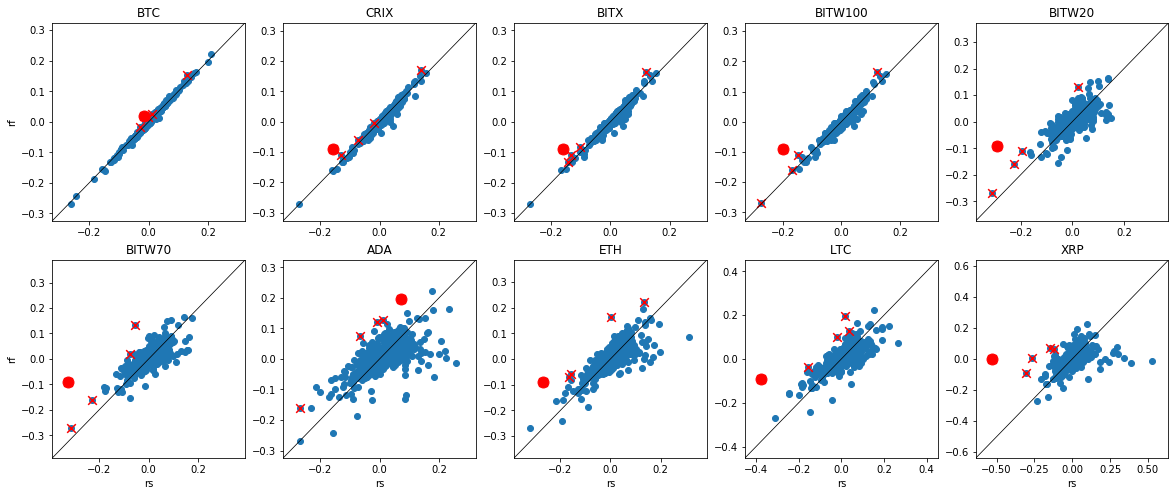

In [10]:
factor = 4
xsize = 5*factor
ysize = 2*factor

fig, axs = plt.subplots(nrows=2,ncols=5, figsize=(xsize, ysize)) #,sharex=True, sharey=True)

for i in range(len(order)):
    rn = order[i]
    cn = new_coin_names[i]

    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                        %(rn, rm)
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)

    ecdf_rs = ECDF(df.rs)
    ecdf_rf = ECDF(df.rf)

    u = df.rs
    v = df.rf
    
    _max = np.max([np.abs(u),np.abs(v)])*1.2
    
    if i <= 4:
        rpos = 0
        cpos = i
    else:
        rpos = 1
        cpos = i-5
    
    axs[rpos,cpos].scatter(u,v)
    axs[rpos,cpos].scatter((list(m_outer[i].rs)),(list(m_outer[i].rf)),
                marker='x', color='r', s=75)
    
#     axs[rpos,cpos].scatter((list(M_outer[i].rs)),(list(M_outer[i].rf)),
#                 marker='x', color='orange', s=75)

    axs[rpos,cpos].set_xlim((-_max, _max))
    axs[rpos,cpos].set_ylim((-_max, _max))
    
    min_id = np.argmin(m_outer[i].rh)
    max_id = np.argmax(M_outer[i].rh)
    min_rs = m_outer[i].loc[min_id, 'rs']
    min_rf = m_outer[i].loc[min_id, 'rf']
    max_rs = M_outer[i].loc[max_id, 'rs']
    max_rf = M_outer[i].loc[max_id, 'rf']
    axs[rpos,cpos].scatter(([min_rs]), ([min_rf]), color='r', marker='o', s=120)
#     axs[rpos,cpos].scatter(([max_rs]), ([max_rf]), color='orange', marker='o', s=120)
    
    diagonal = np.linspace(-_max, _max, 100)
    axs[rpos,cpos].plot(diagonal, diagonal, c='black', linewidth=0.75)
    
    if cpos == 0:
        axs[rpos,cpos].set_ylabel('rf')
        
    if rpos == 1:
        axs[rpos,cpos].set_xlabel('rs')

    axs[rpos,cpos].set_title(cn)
plt.savefig('outliers.png', transparent=True)